In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

### Seasonal-Trend Decomposition using LOESS (STL)

In [2]:
df_ice_cream = pd.read_csv('icecream_vs_heater.csv',usecols=['Month','icecream'])
df_ice_cream.head()

,Month,icecream
0,2004-01,13
1,2004-02,15
2,2004-03,16
3,2004-04,19
4,2004-05,21


In [3]:
df_ice_cream.Month = pd.to_datetime(df_ice_cream.Month)
df_ice_cream.head()

,Month,icecream
0,2004-01-01,13
1,2004-02-01,15
2,2004-03-01,16
3,2004-04-01,19
4,2004-05-01,21


In [4]:
df_ice_cream.set_index('Month',inplace=True)
df_ice_cream.head()

,icecream
Month,
2004-01-01,13
2004-02-01,15
2004-03-01,16
2004-04-01,19
2004-05-01,21


In [5]:
ice_cream_interest = df_ice_cream.asfreq(pd.infer_freq(df_ice_cream.index))
ice_cream_interest.head()

,icecream
Month,
2004-01-01,13
2004-02-01,15
2004-03-01,16
2004-04-01,19
2004-05-01,21


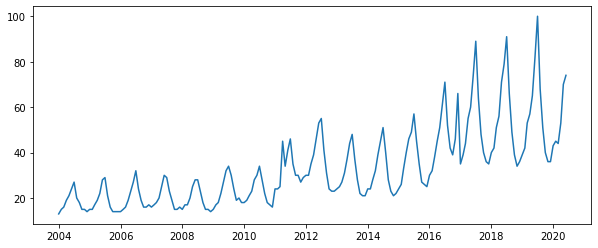

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

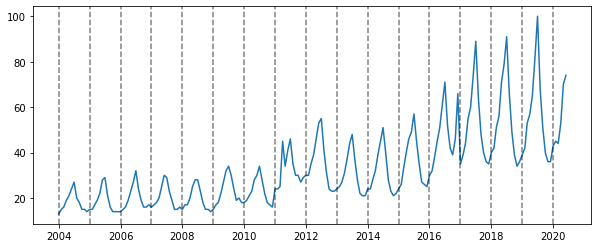

In [7]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

### Visual Inspection: Mid-2011 and Late-2016

In [8]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [9]:
seasonal,trend,resid = result.seasonal,result.trend,result.resid

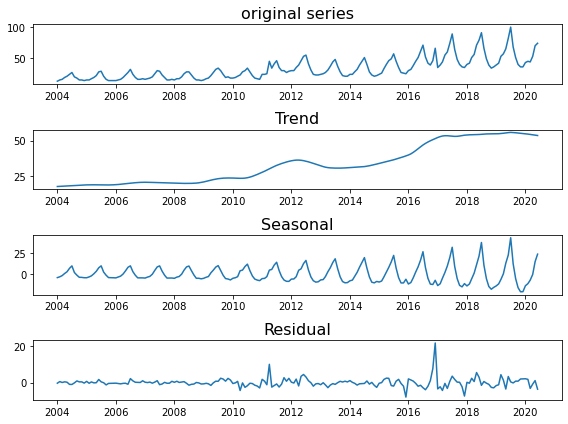

In [10]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('original series',fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

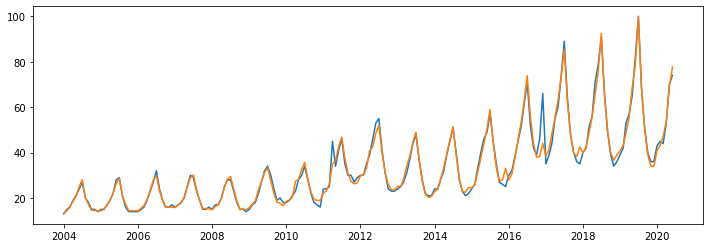

In [11]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

## Anamoly detection

In [12]:
resid_mean = resid.mean()
resid_std  = resid.std()

lower = resid_mean - 3*resid_std
upper = resid_mean + 3*resid_std

(12296.0, 18597.0)

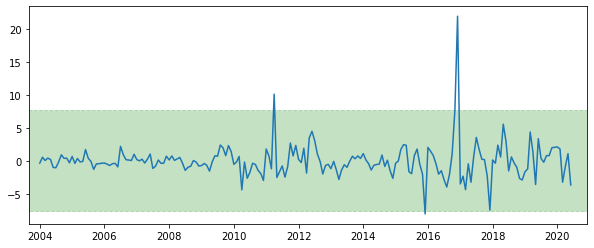

In [13]:
plt.figure(figsize=(10,4))
plt.plot(resid)
plt.fill_between([datetime(2003,1,1),datetime(2021,8,1)],upper,lower,color='g',alpha=0.23,linestyle='--')
plt.xlim(datetime(2003,9,1),datetime(2020,12,1))

In [14]:
anamolies = ice_cream_interest[(resid<lower)|(resid>upper)]
anamolies

,icecream
Month,
2011-04-01,45
2015-12-01,25
2016-11-01,46
2016-12-01,66


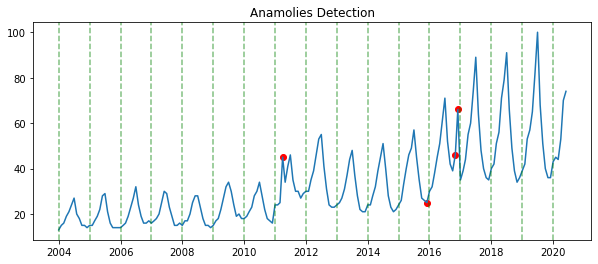

In [15]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
plt.title('Anamolies Detection')
for year in range(2004,2021):
    plt.axvline(pd.to_datetime(str(year)),linestyle='--',color='g',alpha=0.5)
plt.scatter(anamolies.index,anamolies.icecream,color='r',marker='o')